In [50]:
import collections
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
clade_dic = { 'BOP':['Achnatherum_splendens','Aegilops_bicornis','Aegilops_longissima','Aegilops_searsii','Aegilops_sharonensis','Aegilops_speltoides','Aegilops_tauschii','Aegilops_umbellulata','Alopecurus_myosuroides','Avena_atlantica','Avena_eriantha','Avena_insularis','Avena_longiglumis','Avena_nuda','Avena_sativa','Avena_strigosa','Brachypodium_distachyon','Brachypodium_hybridum','Brachypodium_stacei','Brachypodium_sylvaticum','Bromus_tectorum','Dactylis_glomerata','Hordeum_marinum','Hordeum_spontaneum','Hordeum_vulgare','Lolium_multiflorum','Lolium_perenne','Lolium_rigidum','Poa_annua','Poa_infirma','Poa_pratensis','Poa_supina','Poa_trivialis','Pseudoroegneria_libanotica','Puccinellia_tenuiflora','Secale_cereale','Stipa_capillata','Thinopyrum_elongatum','Triticum_aestivum','Triticum_monococcum','Triticum_timopheevii','Triticum_turgidum','Triticum_urartu','Ampelocalamus_luodianensis','Bonia_amplexicaulis','Dendrocalamus_brandisii','Dendrocalamus_latiflorus','Dendrocalamus_sinicus','Guadua_angustifolia','Hsuehochloa_calcarea','Melocanna_humilis','Olyra_latifolia','Otatea_glauca','Phyllostachys_edulis','Raddia_distichophylla','Raddia_guianensis','Rhipidocladum_racemiflorum','Leersia_perrieri','Oryza_alta','Oryza_australiensis','Oryza_barthii','Oryza_brachyantha','Oryza_coarctata','Oryza_eichingeri','Oryza_glaberrima','Oryza_glumaepatula','Oryza_granulata','Oryza_longistaminata','Oryza_meridionalis','Oryza_nivara','Oryza_officinalis','Oryza_punctata','Oryza_rhizomatis','Oryza_rufipogon','Oryza_sativa','Zizania_latifolia','Zizania_palustris'],
            'PACMAD':['Alloteropsis_semialata','Bothriochloa_decipiens','Cenchrus_alopecuroides','Cenchrus_americanus','Cenchrus_fungigraminus','Cenchrus_purpureus','Coix_aquatica','Coix_lacryma-jobi','Dichanthelium_oligosanthes','Digitaria_exilis','Echinochloa_colona','Echinochloa_crus-galli','Echinochloa_haploclada','Echinochloa_oryzoides','Eremochloa_ophiuroides','Erianthus_fulvus','Microstegium_vimineum','Miscanthus_floridulus','Miscanthus_lutarioriparius','Miscanthus_sinensis','Panicum_hallii','Panicum_miliaceum','Panicum_virgatum','Paspalum_notatum','Paspalum_vaginatum','Saccharum_spontaneum','Saccharum_x_sp.','Setaria_italica','Setaria_viridis','Sorghum_bicolor','Themeda_triandra','Tripidium_rufipilum','Zea_mays','Aeluropus_littoralis','Chloris_gayana','Chloris_virgata','Cleistogenes_songorica','Cynodon_dactylon','Cynodon_transvaalensis','Eleusine_coracana','Eleusine_indica','Eragrostis_curvula','Eragrostis_nindensis','Eragrostis_tef','Leptochloa_chinensis','Orinus_kokonorica','Oropetium_thomaeum','Sporobolus_pyramidalis','Sporobolus_stapfianus','Zoysia_japonica','Zoysia_matrella','Zoysia_pacifica','Phragmites_australis'],
            'BASE':['Pharus_latifolius' , 'Streptochaeta_angustifolia'],
            'OUTGROUP':['Ananas_comosus'] }

sp_clade_dic = {}
for tmp_clade,sps in clade_dic.items():
    for tmp_sp in sps:
        sp_clade_dic[tmp_sp] = tmp_clade

In [3]:
def read_OrthoGroup_file( file_path:str = '' ):
    OG_dic = collections.defaultdict(list)
    with open(file= file_path) as f:
        datas = f.readlines()
        title_line = datas[0].strip().split('\t')
        for tmp_line in  datas[1:]:
            tmp_line = tmp_line.strip().split('\t')
            for tmp_idx,tmp_genes in enumerate(tmp_line):
                if tmp_idx == 0:
                    continue
                else:
                    tmp_genes = tmp_genes.split(', ')
                    OG_dic[ tmp_line[0] ].extend( [(tmp_gene, title_line[tmp_idx] ) for tmp_gene in tmp_genes ]  )
        return OG_dic

In [4]:
OG_file = '/home/gujianhui/BLOCKOME/01.data/02.pep/OrthoFinder/Results_Aug02/Orthogroups/Orthogroups.tsv'
tmp_OGs = read_OrthoGroup_file( OG_file)

In [5]:
class OrthoGroup:
    def __init__( self , ID:str = '' , genes:list = [] ):
        self.ID = ID
        self.genes = genes
        pass

    def get_clade_cnt( self, clade_dic:dict ):
        self.clade_cnt = collections.defaultdict(int)
        visited = set()
        for tmp_gene, tmp_sp in self.genes:
            if tmp_gene and tmp_sp not in visited:
                self.clade_cnt[ clade_dic.get(tmp_sp) ] += 1
                visited.add( tmp_sp )
        pass
            
OGs = []
for OG_ID in tmp_OGs.keys():
    tmp_OG = OrthoGroup( OG_ID , tmp_OGs[OG_ID] )
    tmp_OG.get_clade_cnt( sp_clade_dic )
    OGs.append( tmp_OG )
    
OGs.sort( key= lambda x:-abs(x.clade_cnt['PACMAD'] - x.clade_cnt['BOP']))

Text(0.5, 0, 'num_of_species')

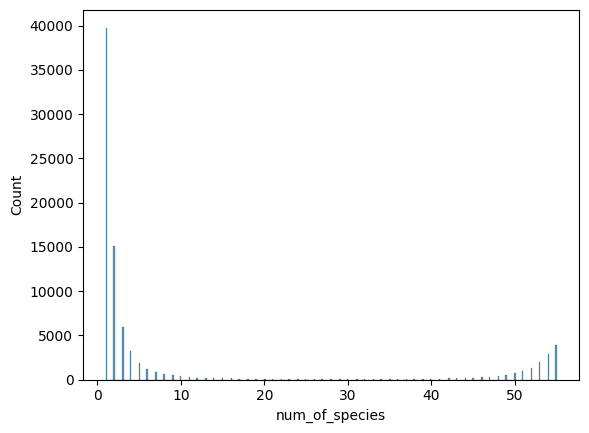

In [59]:
sns.histplot( [sum(i.clade_cnt.values()) for i in OGs ] )
plt.xlabel('num_of_species')

In [6]:
PACMAD_OGs = []
BOP_OGs = []

for i in OGs:
    if i.clade_cnt['PACMAD'] >= 16 and i.clade_cnt['BOP'] <= 6:
        PACMAD_OGs.append(i)
    elif i.clade_cnt['PACMAD'] <= 4  and i.clade_cnt['BOP'] >= 24:
        BOP_OGs.append(i)

print( 'There are %d BOP-specific OGs, %d PACMAD-specific OGs'%(len(BOP_OGs) , len(PACMAD_OGs) ) )

There are 31 BOP-specific OGs, 44 PACMAD-specific OGs


In [25]:
out_f = open('/home/gujianhui/BLOCKOME/01.data/02.pep/OrthoFinder/Results_Aug02/Orthogroups/clade_OG.tsv' , 'w')
print('OG_ID\tPACMAD_cnt\tBOP_cnt\tType' , file= out_f )
for i in PACMAD_OGs:
    print( "%s\t%d\t%d\tPACMAD"%( i.ID , i.clade_cnt['PACMAD'] , i.clade_cnt['BOP']) , file= out_f )

for i in BOP_OGs:
    print( "%s\t%d\t%d\tBOP"%( i.ID , i.clade_cnt['PACMAD'] , i.clade_cnt['BOP']) , file= out_f )

out_f.close()

# the above scripts are based on the result of OrthoFinder
# According to the Orthogroups.tsv output to identify clade-specific OrthoGroups(OG)

# the following scripts are based on the result of collinear analysis to find conserved collinear genes in lineages


In [16]:
class COLLINEAR_GROUP:
    def __init__( self , genes:dict = {}  ):
        self.genes = genes
        self.parent = self
        self.size = len(genes)
        pass
        
        
    def add_gene( self , gene_id:str = '' , score:int = 0 ):
        self.genes[ gene_id ] = score
        self.size += 1
        pass

    def remove_gene( self, gene_ID ):
        del self.genes[gene_ID]
        self.size -= 1
        pass

    def get_gene(self , gene_ID:str = '' ):
        return self.genes.get(gene_ID)
    
    def find_parent( self ):
        tmp_p = self.parent
        while tmp_p != tmp_p.parent:
            tmp_p = tmp_p.find_parent()
        self.parent = tmp_p
        return tmp_p



def read_anchors_file( file_name:str = '' , sp_gene_dic:dict = {} , CGs:list = [] ):
    sp_a,sp_b , _ = file_name.split('/')[-1].split('.')
    with open( file=file_name ) as f:
        datas = f.readlines()
        for tmp_line in datas:
            if tmp_line.startswith('#'):
                continue
            else:
                gene_a,gene_b, tmp_score = tmp_line.strip('\n').split('\t')
                tmp_score = int( tmp_score )
                cg_a , cg_b = sp_gene_dic[sp_a].get(gene_a) , sp_gene_dic[sp_b].get(gene_b)
                if cg_a == None:
                    if cg_b == None:
                        new_cg = COLLINEAR_GROUP( genes={ gene_a:tmp_score , gene_b:tmp_score } )
                        sp_gene_dic[sp_b][ gene_b ] = new_cg
                        sp_gene_dic[sp_a][ gene_a ] = new_cg
                        CGs.append( new_cg )
                    else:
                        cg_b.add_gene( gene_a , tmp_score )
                        sp_gene_dic[sp_a][ gene_a ] = cg_b
                        cg_b.genes[ gene_b ] = max( tmp_score , cg_b.genes[ gene_b ] )
                else:
                    if cg_b == None:
                        cg_a.add_gene( gene_b , tmp_score )
                        sp_gene_dic[sp_b][ gene_b ] = cg_a
                        cg_a.genes[ gene_a ] = max( tmp_score , cg_a.genes[ gene_a ] )
                    else:
                        prev_a , prev_b = cg_a.get_gene( gene_a) , cg_b.get_gene( gene_b )

                        if cg_a.find_parent() == cg_b.find_parent():
                            continue
                        
                        min_ = min( prev_a, prev_b , tmp_score)

                        if min( cg_a.size  , cg_b.size ) <= 5 or tmp_score >= 600:   
                            # if the CG cluster is very small or this two genes are highly similar, just combine this two
                            cg_a.size += cg_b.size
                            cg_b.parent = cg_a
                            cg_a.genes[ gene_a] = max( cg_a.genes[ gene_a] , tmp_score )
                            cg_b.genes[ gene_b] = max( cg_b.genes[ gene_b] , tmp_score )
                            continue 
                        
                        if min_ == prev_b:   # break the link betwwen cg_b and gene_b
                            cg_b.remove_gene( gene_b )
                            cg_a.add_gene( gene_b , tmp_score )
                            sp_gene_dic[sp_b][ gene_b ] = cg_a
                        elif min_ == prev_a:   # break the link betwwen cg_a and gene_a
                            cg_a.remove_gene( gene_a )
                            cg_b.add_gene( gene_a , tmp_score )
                            sp_gene_dic[sp_a][ gene_a ] = cg_b
    return None
                                
                            


In [17]:
# sp_gene_dic = collections.defaultdict(dict)
# CGs = []
# anchors_file = '/home/gujianhui/BLOCKOME/02.blocks/anchors_dir/Oryza_sativa.Zea_mays.anchors'
# anchors_file1 = '/home/gujianhui/BLOCKOME/02.blocks/anchors_dir/Oryza_sativa.Sorghum_bicolor.anchors'
# anchors_file2 = '/home/gujianhui/BLOCKOME/02.blocks/anchors_dir/Sorghum_bicolor.Zea_mays.anchors'


# read_anchors_file( file_name= anchors_file , sp_gene_dic = sp_gene_dic , CGs= CGs )
# read_anchors_file( file_name= anchors_file1 , sp_gene_dic = sp_gene_dic , CGs= CGs )
# read_anchors_file( file_name= anchors_file2 , sp_gene_dic = sp_gene_dic , CGs= CGs )

# a=10067
# CGs[a].genes,CGs[a].parent.genes 


sp_gene_dic = collections.defaultdict(dict)
CGs = []
anchor_dir = '/home/gujianhui/BLOCKOME/02.blocks/anchors_dir/'
anchor_files = [ i for i in os.listdir( anchor_dir ) if 'lifted' not in i ]

counter = 0
for tmp_anchor_file in anchor_files:
    read_anchors_file( file_name=os.path.join(anchor_dir , tmp_anchor_file ) , sp_gene_dic= sp_gene_dic , CGs= CGs )
    counter += 1
    if counter %100 == 0:
        print( "%d files have been loaded"%(counter))

100 files have been loaded
200 files have been loaded
300 files have been loaded
400 files have been loaded
500 files have been loaded
600 files have been loaded
700 files have been loaded
800 files have been loaded
900 files have been loaded
1000 files have been loaded
1100 files have been loaded
1200 files have been loaded
1300 files have been loaded
1400 files have been loaded
1500 files have been loaded


In [32]:
CG_cnt = 0
final_CGs = {}
for tmp_CG in CGs:
    if tmp_CG == tmp_CG.parent:
        tmp_CG.ID = CG_cnt 
        tmp_CG.clade_cnt = collections.defaultdict( int )
        tmp_CG.gene_set = set( tmp_CG.genes.keys() )
        final_CGs[CG_cnt] = tmp_CG
        CG_cnt += 1
        

for tmp_CG in CGs:
    tmp_CG.find_parent().gene_set |= set( tmp_CG.genes.keys() )

In [33]:
## status of CG's clades'distribution
for tmp_sp in sp_gene_dic.keys():
    visited = set()
    for tmp_gene,tmp_CG in sp_gene_dic[ tmp_sp ].items():
        tmp_CG = tmp_CG.find_parent()
        if tmp_CG not in visited:
            tmp_CG.clade_cnt[ sp_clade_dic[tmp_sp] ] += 1
            visited.add( tmp_CG )


## output the results
cnt_f = open('/home/gujianhui/BLOCKOME/02.blocks/CG_clade_cnt.tsv' , 'w')
print( 'CG\tPACMAD\tBOP' , file= cnt_f )

gene_f = open('/home/gujianhui/BLOCKOME/02.blocks/CG_genes.tsv' , 'w')
print( 'CG\tgenes' , file= gene_f )

for ID,tmp_CG in final_CGs.items():
    tmp_ID = 'CG'+str(ID).zfill(6)
    print( '%s\t%s\t%s'%(tmp_ID , tmp_CG.clade_cnt['PACMAD'] , tmp_CG.clade_cnt['BOP'] ) , file= cnt_f)
    if len(tmp_CG.gene_set) <= 5:
        continue
    print( '%s\t%s'%(tmp_ID , ', '.join(list(tmp_CG.gene_set)) )  , file=gene_f)

cnt_f.close()
gene_f.close()

Text(0.5, 0, 'num_of_spceies')

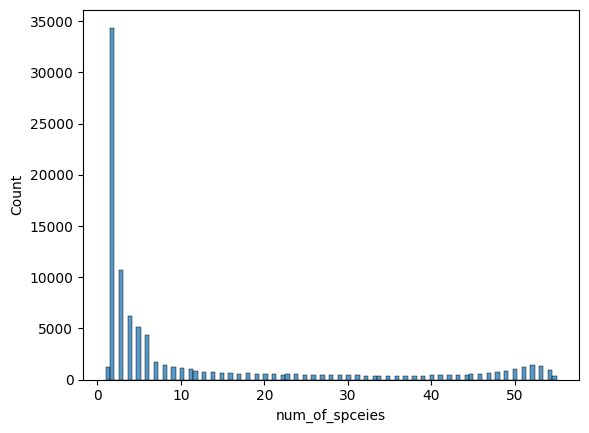

In [57]:
sns.histplot( [ min( sum(i.clade_cnt.values()), 100 ) for i in final_CGs.values() if len(i.gene_set) > 0 ] )

plt.xlabel('num_of_spceies')


In [60]:
## clade-specific CGs identifying
PACMAD_CGs = []
BOP_CGs = []
for i in final_CGs.values():
    if i.clade_cnt['PACMAD'] >= 16 and i.clade_cnt['BOP'] <= 6:
        PACMAD_CGs.append(i)
    elif i.clade_cnt['PACMAD'] <= 4  and i.clade_cnt['BOP'] >= 24:
        BOP_CGs.append(i)



In [61]:
len(PACMAD_CGs) , len(BOP_CGs)

(516, 214)

In [30]:
for i in sp_gene_dic['Zea_mays']['transcript:Zm00001eb383680_T002'].find_parent().gene_set:
    print( i )

transcript:PAN23802
transcript:scaffold33.271.t1
Bam06Bg04560.mRNA1
AA002159.mRNA1
Ol06g10350.mRNA1
Ot_Chr2_17687.mRNA1
evm.model.ctg402.286
CsA302741.1
Dsi06Bg06270.mRNA1
transcript:KYUSt_chr7.15597
transcript:EER89889
Pavag10G158300.1.v3.1
Chr1.g02581.m1
transcript:Zm00001eb383680_T002
Tel7E01T574800.1
Alu06Cg04280.mRNA1
Sp2s00278_47550.mRNA1
Phala.04G141900.1
EVM0012044.1
Cl027218_T1
transcript:TKW21779
Chr2.g06003.m1
Sp2s00005_78550.mRNA1
Zjn_sc00008.1.g07820.1.sm.mkhc
transcript:SECCE7Rv1G0495670.1
Eru09G003905.t1
transcript:TraesCS7D02G333900.1
transcript:HORVU.MOREX.r3.7HG0709970.1
PaChr8.1011.mRNA1
Contig40.284.mRNA1
EVM0015626.1
Pt_Chr0400129-RA
transcript:Dexi4A01G0014780.1
sjg19051.t1.mRNA1
transcript:scaffold245.81.t1
transcript:AeUmb.TA1851.r1.7UG0014150.3
EVM0047161.2
transcript:KQK18156
OkoG044850.1


In [27]:
test_CG1 = COLLINEAR_GROUP()
test_CG2 = COLLINEAR_GROUP()
test_CG3 = COLLINEAR_GROUP()

test_CG1.parent = test_CG2
test_CG3.parent = test_CG1
print( test_CG3.find_parent() == test_CG1)

RecursionError: maximum recursion depth exceeded